
Exercise


   1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave    the company or continue to work)
   2. Plot bar charts showing impact of employee salaries on retention
   3. Plot bar charts showing corelation between department and employee retention
   4. Now build logistic regression model using variables that were narrowed down in step 1
   5. Measure the accuracy of the model



# Import libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
from sklearn import linear_model

In [3]:
df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Data Visualization

In [5]:
# We will split the dataframe into two with employees that left or retained in order to to figure out which variables have direct and clear impact on employee retention

df_left = df[df.left==1]

In [6]:
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df_retain = df[df.left==0]

In [8]:
df_retain

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [9]:
# We make a new dataframe grouping by left column

grouped = df.groupby('left')

In [10]:
# And now we get averages on this dataframe only to columns with numerics

grouped.mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the averages tables we assume some things:

1. Satisfaction level is low on employees that left the company (0.44) compared to retained ones (0.66)
2. Number of projects are almost the same
3. Average monthly hours are higher (207) on employees that left the company compared to the retained ones (199)
4. Promotion made by the last 5 years are higher on retained employees

# Plot bar charts showing impact of employee salaries on retention

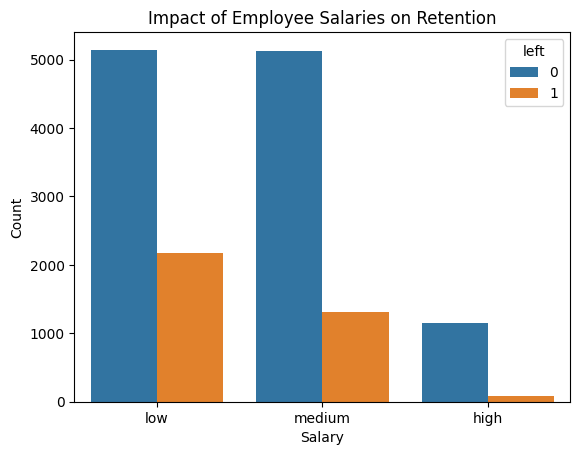

In [11]:
sns.countplot(x='salary', hue='left', data=df)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Impact of Employee Salaries on Retention')
plt.show()

# Plot bar charts showing corelation between department and employee retention

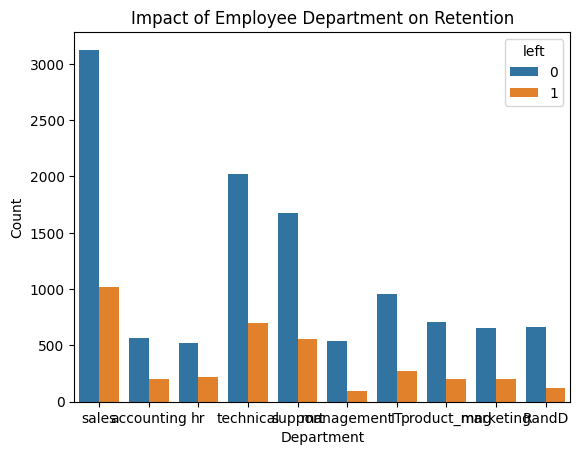

In [12]:
sns.countplot(x='Department', hue='left', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Impact of Employee Department on Retention')
plt.show()

# Build logistic regression model using variables that were narrowed down in step 1

In [13]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [14]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [15]:
# We create dummy viarables based on salary column

dummies = pd.get_dummies(subdf['salary'], prefix='salary', dtype=int)

In [16]:
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
# We add the dummies and the subdf

df_with_dummies = pd.concat([subdf,dummies],axis='columns')

In [18]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [19]:
# We drop the salary column

df_with_dummies.drop('salary', axis='columns', inplace=True)

In [20]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [21]:
# Now we have X and y

X = df_with_dummies
y = df['left']

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy of the model


In [32]:
model.score(X_test,y_test)

0.7748888888888888